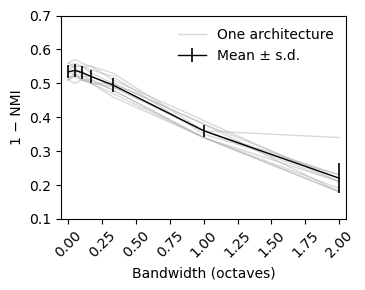

In [1]:
import io
import numpy as np
import matplotlib.pyplot as plt

# ===== 1. Load and parse the file =====
filename = "bandwidth_oct_batch_Arch01-10_n_neighbors = 50_min_dist = 1"  # add extension if needed

with open(filename, "r") as f:
    raw = f.read().strip()

# Split into blocks by blank lines (one block per architecture)
blocks = [b.strip() for b in raw.split("\n\n") if b.strip()]

bandwidth_list = []
nmi_list = []
r2_list = []

for b in blocks:
    # remove the word "octave" and load numeric columns
    clean = b.replace("octave", "")
    arr = np.loadtxt(io.StringIO(clean))  # shape: (7, 3) -> [bandwidth, NMI, R2]
    
    bandwidth_list.append(arr[:, 0])
    nmi_list.append(arr[:, 1])
    if arr.shape[1] > 2:
        r2_list.append(arr[:, 2])

# Convert to numpy arrays
bandwidth = bandwidth_list[0]               # (7,) – same for all architectures
nmi = np.stack(nmi_list, axis=0)            # (n_arch, 7)
if r2_list:
    r2 = np.stack(r2_list, axis=0)

inv_nmi = 1.0 - nmi                          # same shape, std is unchanged by (1 - ·)
inv_r2 = 1.0 - r2    

fig, ax = plt.subplots(figsize=(3.75, 3))

for i in range(inv_nmi.shape[0]):
    ax.plot(
        bandwidth,
        inv_nmi[i],
        marker="o",
        linewidth=1,
        markersize=0,
        alpha=0.5,
        color="0.7",           
    )
    if i==0:
        ax.plot(
        bandwidth,
        inv_nmi[i],
        marker="o",
        linewidth=1,
        markersize=0,
        alpha=0.5,
        color="0.7",           
        label="One architecture",    
    )
mean_inv_nmi = inv_nmi.mean(axis=0)
std_inv_nmi = inv_nmi.std(axis=0)
ax.errorbar(
    bandwidth,
    mean_inv_nmi,
    yerr=std_inv_nmi,
    fmt="o-",
    linewidth=1,
    color="k",
    ecolor="k",
    elinewidth=1.2,
    markersize=0,
    capsize=0,
    label="Mean ± s.d.",
)

ax.set_xlabel("Bandwidth (octaves)")
ax.set_ylabel("1 − NMI")
xticks = np.arange(0, 2.0 + 0.25, 0.25)
ax.set_xticks(xticks)
ax.set_xlim(-0.05, 2.05)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylim(0.1, 0.7)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('IHC3000_A1-10_bandwidth2NMI_neighbor=50.pdf', dpi=300, bbox_inches='tight')
plt.show()


In [2]:
r2

array([[0.35, 0.45, 0.66, 0.28, 0.41, 0.65, 0.59],
       [0.03, 0.11, 0.21, 0.13, 0.17, 0.73, 0.6 ],
       [0.41, 0.7 , 0.69, 0.72, 0.71, 0.75, 0.59],
       [0.71, 0.13, 0.72, 0.31, 0.53, 0.84, 0.71],
       [0.12, 0.07, 0.01, 0.18, 0.53, 0.78, 0.69],
       [0.72, 0.57, 0.63, 0.64, 0.56, 0.8 , 0.65],
       [0.23, 0.69, 0.67, 0.42, 0.48, 0.72, 0.57],
       [0.03, 0.38, 0.67, 0.07, 0.27, 0.78, 0.66],
       [0.05, 0.37, 0.41, 0.77, 0.84, 0.67, 0.69],
       [0.16, 0.46, 0.56, 0.62, 0.58, 0.58, 0.6 ]])

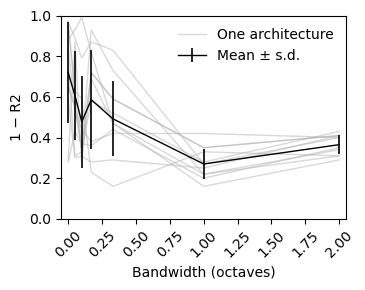

In [4]:
fig, ax = plt.subplots(figsize=(3.75, 3))
for i in range(inv_nmi.shape[0]):
    ax.plot(
        bandwidth,
        inv_r2[i],
        marker="o",
        linewidth=1,
        markersize=0,
        alpha=0.5,
        color="0.7",           
    )
    if i==0:
        ax.plot(
        bandwidth,
        inv_r2[i],
        marker="o",
        linewidth=1,
        markersize=0,
        alpha=0.5,
        color="0.7",           
        label="One architecture",    
    )

mean_inv_r2 = inv_r2.mean(axis=0)
std_inv_r2 = inv_r2.std(axis=0)

ax.errorbar(
    bandwidth,
    mean_inv_r2,
    yerr=std_inv_r2,
    fmt="o-",
    linewidth=1,
    color="k",
    ecolor="k",
    elinewidth=1.2,
    markersize=0,
    capsize=0,
    label="Mean ± s.d.",
)

ax.set_xlabel("Bandwidth (octaves)")
ax.set_ylabel("1 − R2")
xticks = np.arange(0.0, 2.0 + 0.25, 0.25)
ax.set_xticks(xticks)
ax.set_xlim(-0.05, 2.05)
ax.tick_params(axis='x', labelrotation=45)
ax.set_ylim(0, 1)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig('IHC3000_A1-10_bandwidth2R2_neighbor=50.pdf', dpi=300, bbox_inches='tight')
plt.show()